## Convolutional Neural Network Example using Fashion Mnist Dataset
Fashion_MNIST data and description is available on github: https://github.com/zalandoresearch/fashion-mnist <br>

It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes as given below:

**Label 	Description** <br>
0 	T-shirt/top <br>
1 	Trouser <br>
2 	Pullover <br>
3 	Dress <br>
4 	Coat <br>
5 	Sandal <br>
6 	Shirt <br>
7 	Sneaker <br>
8 	Bag <br>
9 	Ankle boot <br>

**Points to be Noted**
1. Each image is of size 28x28 = 784 pixels.
2. Grayscale images have a total of 255 shades/pixels ranges from 0 to 255 to define how much dark or light that pixel will be. 0 = Maximum Dark; 255 = Maximum White.
3. Each row is a separate image and column as labels (0-9).
3. Convolutional Neural Network(CNN) is used for dealing with images (computer vision) and increases the accuracy of model a lot even > 99% by finding the edges in the image

## Imports

In [2]:
# Model run with TensorFlow 2.0
# !pip install -U tensorflow==2.0.0-beta1  # to install tensorflow 2.0-beta1 in Kaggle notebook
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


## Load Training & Test Data and Normalize it

In [3]:
# Load Fashion MNIST Data
mnist = tf.keras.datasets.fashion_mnist
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = mnist.load_data()
print(x_train_images.shape)
print(y_train_labels.shape)
# Convert the image into a 4D list
x_train_images = x_train_images.reshape(60000, 28, 28, 1)  # last 1 indicates that its a gray scale image
print(x_train_images.shape)
x_train_images = x_train_images / 255.0  # Normalize images into values ranging from 0 to 1
x_test_images = x_test_images.reshape(10000, 28, 28, 1)
x_test_images = x_test_images/255.0     # Normalize images into values ranging from 0 to 1

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)


## Define, Compile and Run the Model
**Conv2d:** Used to find edges and filter out important information from the image. The number of convolutions in purely arbitrary, but good to start with something in the order of 32 <br>
**Maxpool2D:** used to compress the image to half while maintaining the content of the features that were highlighted by the convolution layer (conv2d) <br> <br>
**Notice** that the output size of image is 2x2 pixels less which is 26x26 in comparison to input image size of 28x28. This is because when applying a 3x3 filter. It requires adjacent pixels on all 4 directions (left,right,up,down). But since when the filter is convolved at the uppermost, lowermost, leftmost and rightmost pixels, there is no adjacent pixels. Therefore, it decreases the size by 2 from each size resulting in 26x26 image size. Similarly for a 5x5 filter, the image size will be 24x24

In [9]:
# Define the Model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),  # add a convolution layer with 64 random filters of size 3,3
tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),   # Flatten the image into a single 1D array
# Fully Connected Layer
tf.keras.layers.Dense(128, activation='relu'),  # Add a neural network layer with 128 neurons
# Softmax Layer
tf.keras.layers.Dense(10, activation='softmax')]) # Add the final neural network layer with 10 neurons (for 10 classes)

"""Use CategoricalCrossentropy loss function when there are two or more label classes. We expect labels to be 
provided in a one_hot representation. If you want to provide labels as integers, please use 
SparseCategoricalCrossentropy loss."""

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# to see the size and shape of the network,
model.summary()  
    
model.fit(x_train_images, y_train_labels, epochs=5)

test_loss = model.evaluate(x_test_images, y_test_labels, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## Visualizing the Convolutions and Pooling

In [10]:
print(y_test_labels[:100])  # print first 100 test labels

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


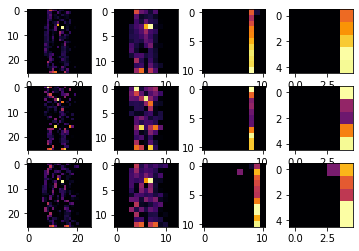

In [12]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)   # args: No. of rows, no. of columns
# Macros. Add the image number forIst, 2nd and 3rd by checking that which 3 test label represents the same label or class
FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

# Below code can be made in just single line using list comprehension
# layer_outputs = []
# for layer in model.layers:
#     layer_outputs.append(layer.output)
# print(layer_outputs)
# print('\n')

# List comprehension code of above commented code lines
layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(x_test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
  f3 = activation_model.predict(x_test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)